In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def datos_lin_separables(clusters=2,samples=100):
    """
    Genera datos linealmente separables
    Se generan hasta 10 clusters distintos c/u con distribución normal N(mu,s)
    Entrada: numero de clusters y numero de muestras por cluster (clase)
    Salida: Lista con matrices de vectores de datos y código de clase por cluster.
    """
    if clusters > 10:
        n = 10
        print('solo se pueden producir hasta 10 clusters')
    elif clusters < 2:
        n = 2
        print('el numero minimo de clusetrs es 2')
    else:
        n = clusters
    
    """    
    arreglo que contiene los valores promedio de cada distribucion de datos
    """
    mus= []   
    
    if n == 2:
        mus.append([-3,-3])
        mus.append([3,3])
    elif n == 3:
        mus.append([-3,-3])
        mus.append([0,3])
        mus.append([5,-3])
    elif n == 4:
        mus.append([-5,-3])
        mus.append([-3,3])
        mus.append([4,-3])
        mus.append([5,4])
    elif n == 5:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
    elif n == 6:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
        mus.append([-9,3])
    elif n == 7:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
        mus.append([-9,3])
        mus.append([8,-3])
    elif n == 8:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
        mus.append([-9,3])
        mus.append([8,-3])
        mus.append([12,6])
    elif n == 9:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
        mus.append([-9,3])
        mus.append([8,-3])
        mus.append([12,6])
        mus.append([-2,8])
    elif n == 10:
        mus.append([-5,-3])
        mus.append([-3,4])
        mus.append([4,-3])
        mus.append([5,4])
        mus.append([1,1])
        mus.append([-9,3])
        mus.append([8,-3])
        mus.append([12,6])
        mus.append([-2,8])
        mus.append([11,0])
        
    mus = np.asarray(mus)
    
    """    
    valor de correlación (rho) entre los datos de una distribución
    """
    rho = np.random.uniform(low=0.2, high=0.8, size=(n,))  
    
    if n==2:
        p=np.random.rand()
        if p < 0.5:
            rho[0]=-rho[0]
            rho[1]=rho[1]
    if n > 3:
        for i in range(n):
            rho[i] *= (-1)**i
    
    """    
    Desviaciones estandar (s) de cada cluster de datos
     - Se genera un vector de dimensión 2xn con valores de s= 1 + un valor aleatorio
     - Luego se transforma el arreglo en una matriz bidimensional con n filas y 2 columnas
       donde n es el número de clusters
    """
    s = np.random.rand(2*n)+1
    s = s.reshape((n,2))
    
    """    
    Matriz de covarianzas
     - Se construye la matriz:
      [[s_0^2   s_0 x s_1 x rho]
       [s_0 x s_1 x rho   s_1^2]]
    """
    cov_list = []
    for i,v in enumerate(s):
        cov = np.zeros((2,2))
        cov[0,0] = v[0]**2
        cov[1,1] = v[1]**2
        cov[0,1] = v[0]*v[1]*rho[i]
        cov[1,0] = cov[0,1]
        cov_list.append(cov)
    
    """    
    Arreglo de salida
    """
    L = []
    
    clases = np.arange(n,dtype='int')
    if n==2:
        clases[0]=-1
        
    """    
    Se genera un arreglo con el valor de clase por el número de muestras
    """
    y = np.repeat(clases[0],samples).reshape(samples,1).astype(int)
    
    for i in range(1,n):
        yp = np.repeat(clases[i],samples).reshape(samples,1).astype(int)
        y = np.hstack((y,yp))
    
    """    
    Se genera un arreglo de clusters, que son distribuciones normales incluyendo el valor de la clase 
    """
    for i in range(n):
        X = np.random.multivariate_normal(mus[i], cov_list[i],samples)
        X = np.hstack((X,y[:,i].reshape(samples,1).astype(int)))
        L.append(X)
        
    return np.array(L)


In [8]:
L = datos_lin_separables(clusters=4,samples=100)
print(L.shape)

(4, 100, 3)


In [10]:
np.save('../../data/datosNumpy.npy', L)

In [12]:
data = np.load('../../data/datosNumpy.npy')
print(data.shape)

(4, 100, 3)


In [15]:
X=data[:,:,:-1]
y=data[:,:,-1]
print(y.shape, X.shape)

(4, 100) (4, 100, 2)


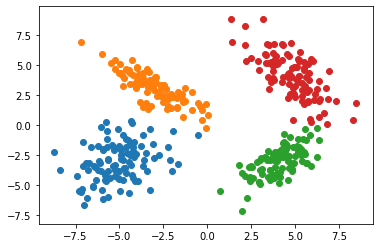

In [43]:
import matplotlib

colores = ['red','green','blue','purple']

fig = plt.figure()
ax = fig.add_subplot(111)

for x in X:
    plt.scatter(x[:, 0], x[:, 1], cmap=matplotlib.colors.ListedColormap(colores))

In [52]:
centroides = []
for x in X:
    centroides.append(np.mean(x,axis=0))
centroides = np.array(centroides)
print(centroides)

[[-5.07257895 -3.06192512]
 [-2.96513393  3.06367645]
 [ 4.06018293 -3.0318583 ]
 [ 4.8313349   4.14029113]]


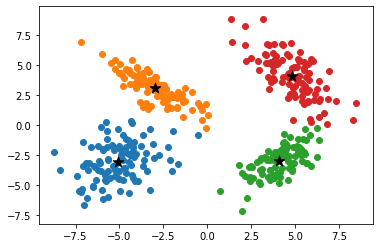

In [54]:
for x in X:
    plt.scatter(x[:, 0], x[:, 1], cmap=matplotlib.colors.ListedColormap(colores))
plt.scatter(centroides[:,0],centroides[:,1],marker='*',s=120,color='k')
plt.show()

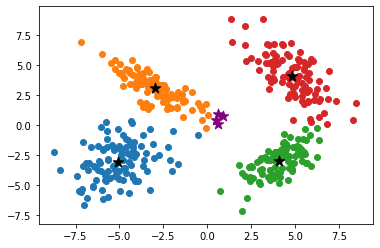

In [55]:
guess = np.random.rand(4,2)
for x in X:
    plt.scatter(x[:, 0], x[:, 1], cmap=matplotlib.colors.ListedColormap(colores))
plt.scatter(centroides[:,0],centroides[:,1],marker='*',s=120,color='k')
plt.scatter(guess[:,0],guess[:,1],marker='*',s=120,color='purple')
plt.show()

In [94]:
np.random.seed(seed = 1)
x = np.random.dirichlet(alpha = np.ones(5), size = 1)
x_ = np.random.uniform(-1,1,5)
print(x_)
epsilon = np.random.rand()

y = -x+epsilon
arr = np.concatenate([y,x]).ravel()
arr = arr/np.sum(arr)

print(x_, np.sum(x))
print(arr, np.sum(arr))

[-0.81532281 -0.62747958 -0.30887855 -0.20646505  0.07763347]
[-0.81532281 -0.62747958 -0.30887855 -0.20646505  0.07763347] 1.0
[ 8.96285460e-02 -6.06107033e-02  1.99976604e-01  1.26362674e-01
  1.67537399e-01  1.10371454e-01  2.60610703e-01  2.33956640e-05
  7.36373265e-02  3.24626006e-02] 0.9999999999999999


In [91]:
from scipy import stats

stats.kstest(x_, stats.uniform(loc=0.0, scale=5.0).cdf)

KstestResult(statistic=0.8922366531993287, pvalue=2.9066005379306368e-05)